<a href="https://colab.research.google.com/github/ishleenkaur256/Assignment_EAI/blob/main/Mini_Project_Pycaret_(Customer_Churn_Prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/pycaret/pycaret.git@master --upgrade

  Cloning https://github.com/pycaret/pycaret.git (to revision master) to /tmp/pip-req-build-gkrznho2
  Running command git clone --filter=blob:none --quiet https://github.com/pycaret/pycaret.git /tmp/pip-req-build-gkrznho2
  Resolved https://github.com/pycaret/pycaret.git to commit 58ec3c282d58e94727f9d5b77b49f241e9103ab3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
df = pd.read_csv(url)

print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)


In [5]:
from pycaret.classification import *

clf = setup(
    data=df,
    target='Churn',
    train_size=0.7,
    session_id=42,
    normalize=True,
    remove_multicollinearity=True,
    multicollinearity_threshold=0.95,

)


,Description,Value
0,Session id,42
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(7032, 21)"
5,Transformed data shape,"(7032, 36)"
6,Transformed train set shape,"(4922, 36)"
7,Transformed test set shape,"(2110, 36)"
8,Numeric features,4
9,Categorical features,16


In [6]:
best_model = compare_models()
best_model


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.7601,0.7326,0.7601,0.7353,0.7282,0.2631,0.2908,0.4220
lr,Logistic Regression,0.7343,0.8407,0.7343,0.5391,0.6217,0.0000,0.0000,1.2660
nb,Naive Bayes,0.7343,0.5000,0.7343,0.5391,0.6217,0.0000,0.0000,0.5100
dt,Decision Tree Classifier,0.7343,0.5000,0.7343,0.5391,0.6217,0.0000,0.0000,0.3970
svm,SVM - Linear Kernel,0.7343,0.5266,0.7343,0.5391,0.6217,0.0000,0.0000,0.3770
ridge,Ridge Classifier,0.7343,0.8391,0.7343,0.5391,0.6217,0.0000,0.0000,0.5150
rf,Random Forest Classifier,0.7343,0.7863,0.7343,0.5391,0.6217,0.0000,0.0000,0.7780
qda,Quadratic Discriminant Analysis,0.7343,0.5145,0.7343,0.5391,0.6217,0.0000,0.0000,0.5070
ada,Ada Boost Classifier,0.7343,0.5000,0.7343,0.5391,0.6217,0.0000,0.0000,0.3780
gbc,Gradient Boosting Classifier,0.7343,0.5000,0.7343,0.5391,0.6217,0.0000,0.0000,0.9840


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7627,0.7346,0.7627,0.7395,0.7371,0.2898,0.3104
1,0.7728,0.7338,0.7728,0.7582,0.7326,0.2725,0.3220
2,0.7622,0.7252,0.7622,0.7390,0.7366,0.2894,0.3100
3,0.7683,0.7523,0.7683,0.7470,0.7390,0.2936,0.3218
4,0.7541,0.7575,0.7541,0.7269,0.7236,0.2524,0.2756
5,0.7602,0.7241,0.7602,0.7358,0.7325,0.2772,0.2997
6,0.7622,0.7417,0.7622,0.7384,0.7328,0.2771,0.3026
7,0.7419,0.7160,0.7419,0.7070,0.7039,0.1968,0.2218
8,0.7358,0.7368,0.7358,0.6958,0.6955,0.1688,0.1916


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7830,0.8286,0.7830,0.7676,0.7561,0.3392,0.3703
1,0.7911,0.8158,0.7911,0.7806,0.7628,0.3565,0.3951
2,0.7642,0.8130,0.7642,0.7416,0.7383,0.2935,0.3153
3,0.8069,0.8462,0.8069,0.7997,0.7851,0.4198,0.4523
4,0.7927,0.8512,0.7927,0.7791,0.7730,0.3892,0.4113
5,0.7967,0.8508,0.7967,0.7898,0.7687,0.3731,0.4152
6,0.7805,0.8127,0.7805,0.7634,0.7586,0.3496,0.3714
7,0.7825,0.8112,0.7825,0.7660,0.7613,0.3575,0.3787
8,0.7663,0.8197,0.7663,0.7433,0.7356,0.2799,0.3084


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


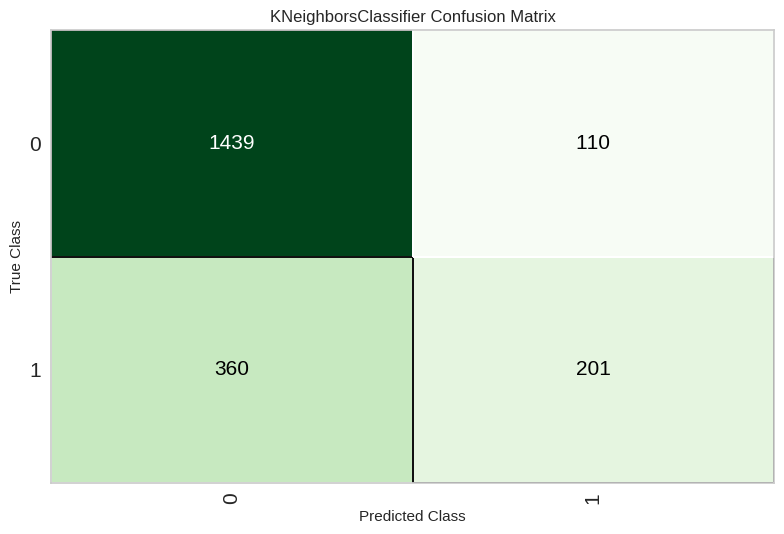

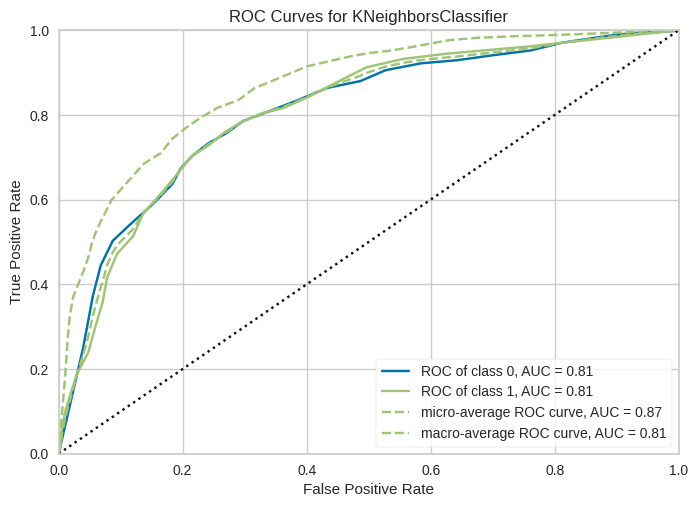

In [7]:
model = create_model(best_model)
tuned_model = tune_model(model)
plot_model(tuned_model, plot='confusion_matrix')
plot_model(tuned_model, plot='auc')


In [8]:
final_model = finalize_model(tuned_model)

predictions = predict_model(final_model)
predictions.head()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.7839,0.8334,0.7839,0.7700,0.7549,0.3353,0.3711


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
4221,7926-IJOOU,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,Month-to-month,No,Credit card (automatic),19.299999,19.299999,No,No,0.9722
1820,7554-AKDQF,Female,0,Yes,No,6,Yes,No,DSL,No,...,No,No,Month-to-month,No,Mailed check,45.650002,323.450012,No,No,0.8056
2375,0013-SMEOE,Female,1,Yes,No,71,Yes,No,Fiber optic,Yes,...,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.699997,7904.250000,No,No,0.9722
5462,9289-LBQVU,Male,0,Yes,No,64,Yes,Yes,DSL,No,...,No,Yes,One year,Yes,Mailed check,70.150002,4480.700195,No,No,0.9167
1791,2348-KCJLT,Female,0,Yes,No,44,Yes,No,DSL,Yes,...,No,No,One year,Yes,Mailed check,61.500000,2722.199951,No,No,0.9444


In [9]:
save_model(final_model, 'Customer_Churn_Model')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['SeniorCitizen', 'tenure',
                                              'MonthlyCharges', 'TotalCharges'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty...
                                     transformer=RemoveMulticollinearity(threshold=0.95))),
                 ('normalize',
                  TransformerWrapper(exclude=None, include=None,
                       

In [10]:
new_data = df.sample(5)
predict_model(final_model, data=new_data)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
2481,6614-YWYSC,Male,1,Yes,No,61,Yes,Yes,No,No internet service,...,No internet service,No internet service,Two year,No,Bank transfer (automatic),25.000000,1501.750000,No,No,1.0000
6784,9546-KDTRB,Female,0,No,No,19,Yes,Yes,No,No internet service,...,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),24.700001,465.850006,No,No,0.9444
6125,0871-URUWO,Male,0,Yes,No,13,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Credit card (automatic),102.250000,1359.000000,Yes,Yes,0.8889
3052,5151-HQRDG,Male,0,Yes,No,37,Yes,Yes,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,55.049999,2030.750000,No,No,0.8611
4099,6624-JDRDS,Female,0,No,No,6,No,No phone service,DSL,Yes,...,No,No,Month-to-month,No,Bank transfer (automatic),29.450001,161.449997,No,No,0.8611
